/Users/gshilong/miniconda3/envs/qutip_env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/gshilong/miniconda3/envs/qutip_env/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


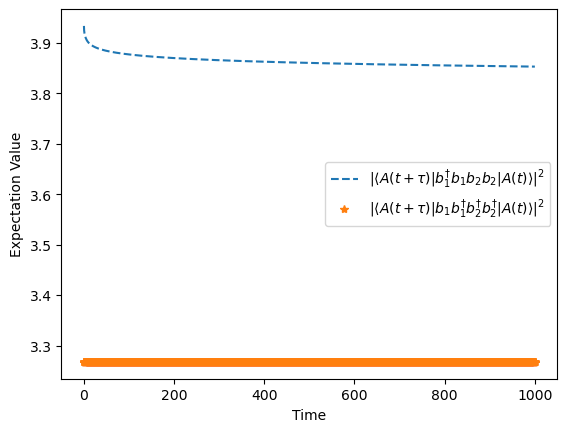

In [6]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

N = 10  # Fock空间维度
b1 = tensor(destroy(N), qeye(N))  
b2 = tensor(qeye(N), destroy(N))  
omega = 1.0
g_0 = 0.1

# 定义系统的哈密顿量 H 和观测量 Q1 和 Q2
H0 = omega * (b1.dag() * b1 + b2.dag() * b2 + 1)
H1 = g_0/(omega**2) * ((b1.dag() + b1)**2) * ((b2.dag() + b2)**2)
H = H0 + H1  # 哈密顿量
Q1 = b1.dag() * b1 * b2 * b2 
Q2 = b1 * b1.dag() * b2.dag() * b2.dag() # 观测量

psi0 = tensor(basis(N, 0), basis(N, 0))  # 两个谐振子的基态

# 定义时间范围和时间间隔
t_list = np.linspace(0, 1000, 10000) # 时间范围
tau = 0.00001  # 时间间隔

# 计算随时间演化的期望值
expectation_values1 = []
a1 = []

for t in t_list:
    result = mesolve(H, psi0, [t, t + tau], [b1.dag() * b1 * b2 * b2])
    A_t_plus_tau1 = result.states[-1]
    expectation_value1 = expect(Q1, A_t_plus_tau1)
    a1.append(np.vdot(expectation_value1,expectation_value1))
    y1 = np.log(np.log(a1))
    # expectation_values1.append(expectation_value1)

expectation_values2 = []
a2 = []
for t in t_list:
    result = mesolve(H, psi0, [t, t + tau], [b1 * b1.dag() * b2.dag() * b2.dag()])
    A_t_plus_tau2 = result.states[-1]
    expectation_value2 = expect(Q2, A_t_plus_tau2)
    a2.append(np.vdot(expectation_value2,expectation_value2))
    y2 = np.log(np.log(a2))
    # expectation_values2.append(expectation_value2)
    

# 绘制结果
# plt.plot(t_list, expectation_values1, label=r'$\langle A(t+\tau) | b_1^{\dagger}b_1b_2b_2 | A(t) \rangle$')
# plt.plot(t_list, expectation_values2, label=r'$\langle A(t+\tau) | b_1b_1^{\dagger}b_2^{\dagger}b_2^{\dagger} | A(t) \rangle$')
plt.figure()
plt.plot(t_list, y1 ,'--', label=r'$|\langle A(t+\tau) | b_1^{\dagger}b_1b_2b_2 | A(t) \rangle|^2$')
plt.plot(t_list, y2 ,'*', label=r'$|\langle A(t+\tau) | b_1b_1^{\dagger}b_2^{\dagger}b_2^{\dagger} | A(t) \rangle|^2$')
# plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()